# Дипломная работа по python

In [1]:
from IPython.display import IFrame, display
filepath = "dip_python.pdf"
IFrame(filepath, width=900, height=1600)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

#### Задание 1
Загрузите файл HR.csv в pandas dataframe 

In [3]:
hr = pd.read_csv('HR.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Задание 2
Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
hr.describe(include = 'all')

# mean - среднее
# 50% - медиана
# min, max - мин, макс соответственно :)
# std - сред.отклонение (стандартное отклонение)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [5]:
# моду считаем отдельно

hr.mode()

# для average_montly_hours получилось 2 значения моды

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


#### Задание 3
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.  
Определите две самые скоррелированные и две наименее скоррелированные переменные

In [6]:
# отсеим лишние столбцы и сделаем новый датафрейм

df_3 = hr.drop(columns=['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary'],)
df_3.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


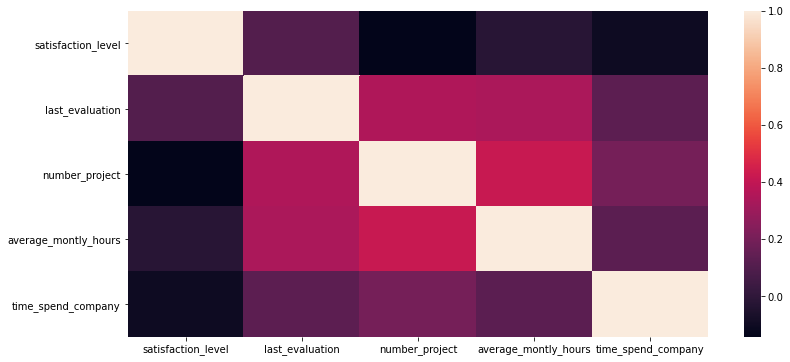

In [7]:
# построим тепловую карту получившихся значений корреляции

sns.heatmap(df_3.corr())

In [8]:
# найдём максимальную корреляцию

max([df_3.corr()[df_3.corr()[column] < 1][column].max() for column in list(df_3.corr())])

0.4172106344017606

In [9]:
# найдём минимальную корреляцию по модулю

min([df_3.corr()[column].apply((lambda x: -x if x < 0 else x)).min() for column in list(df_3.corr())])

0.020048113219473

Две самые скоррелированные переменные: average_montly_hours и number_project (0.417)  
Две наименее скоррелированные переменные: average_montly_hours и satisfaction_level (-0.02)

#### Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [10]:
hr.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

#### Задание 5
Показать распределение сотрудников по зарплатам. 

In [11]:
# первый вариант

pd.DataFrame(hr.groupby('salary')['salary'].count().sort_values(ascending=False)).style.bar(align='mid')

,salary
salary,
low,7316
medium,6446
high,1237


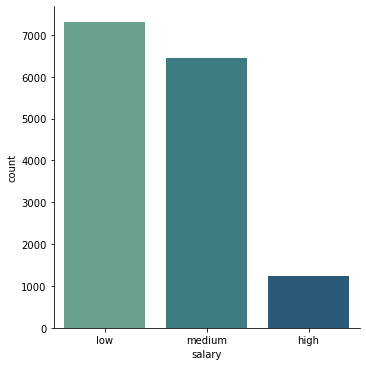

In [12]:
# второй вариант

sns.catplot(x="salary", palette="crest", kind="count", data=hr)

#### Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [13]:
# создадим новый датафрейм с нужными нам данными

df_6 = (pd.DataFrame(hr.groupby('department')['salary'].value_counts())
          .rename(columns={'salary': 'count'})
          .reset_index())

df_6

,department,salary,count
0,IT,low,609
1,IT,medium,535
2,IT,high,83
3,RandD,medium,372
4,RandD,low,364
5,RandD,high,51
6,accounting,low,358
7,accounting,medium,335
8,accounting,high,74
9,hr,medium,359


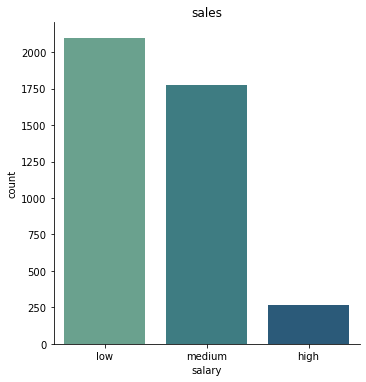

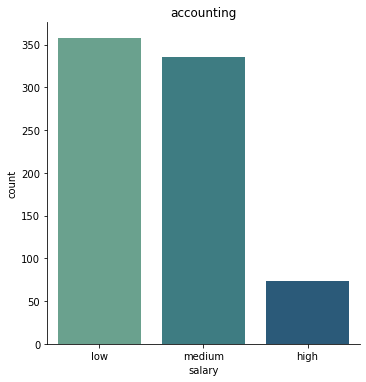

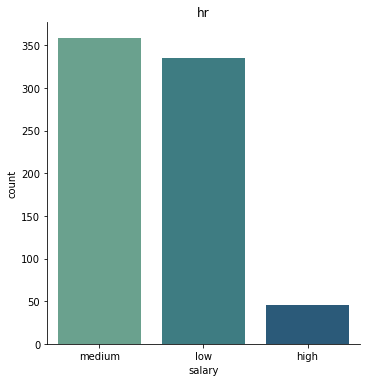

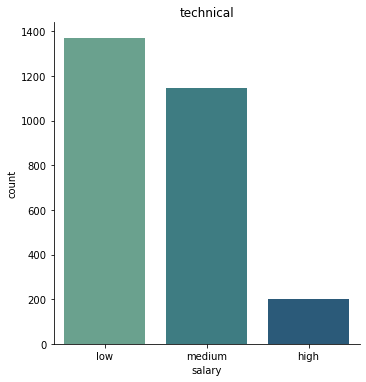

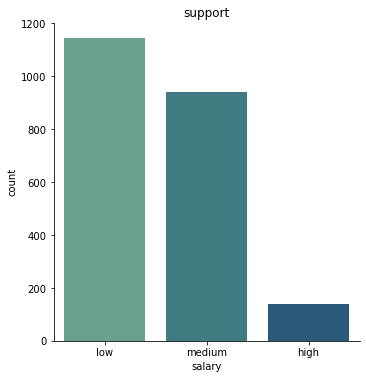

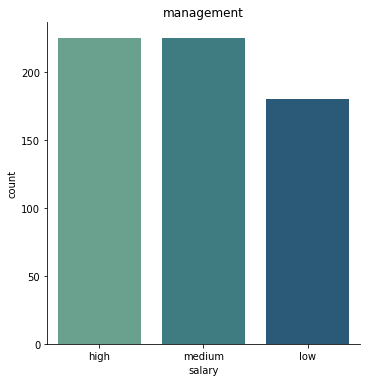

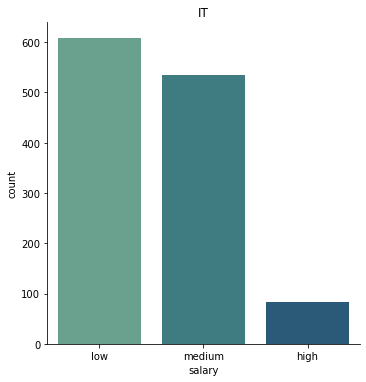

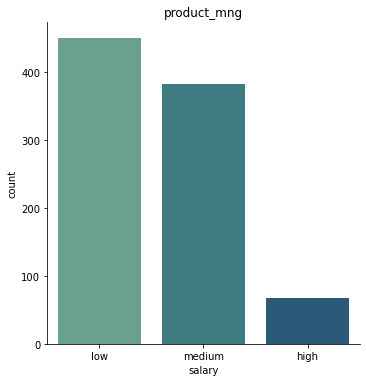

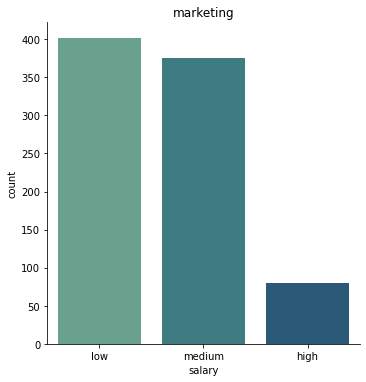

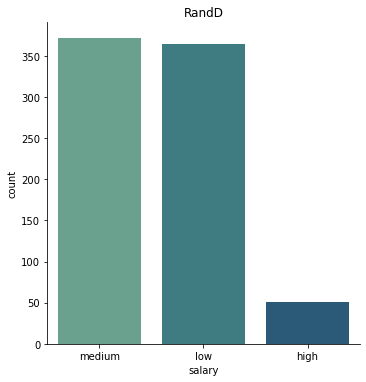

In [14]:
# напишем цикл, который будет строить гистограмму для каждого отдела отдельно по нашему новому датафрейму

for department in list(hr.department.unique()):
    sns.catplot(x="salary",
                y='count',
                palette="crest",
                kind='bar',
                data=df_6[df_6['department']==department])
    plt.title(department)

#### Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [15]:
# сделаем общий датафрейм, по которому выведем график распределения сотрудников по зарплатам

df_7 = pd.DataFrame({'low' : hr[hr['salary']=='low']['average_montly_hours'],
                     'medium' : hr[hr['salary']=='medium']['average_montly_hours'],
                     'high' : hr[hr['salary']=='high']['average_montly_hours']})

# сделаем группу датафреймов, которые будем использовать для рассчетов

low = pd.DataFrame({'low' : hr[hr['salary']=='low']['average_montly_hours']})
medium = pd.DataFrame({'medium' : hr[hr['salary']=='medium']['average_montly_hours']})
high = pd.DataFrame({'high' : hr[hr['salary']=='high']['average_montly_hours']})


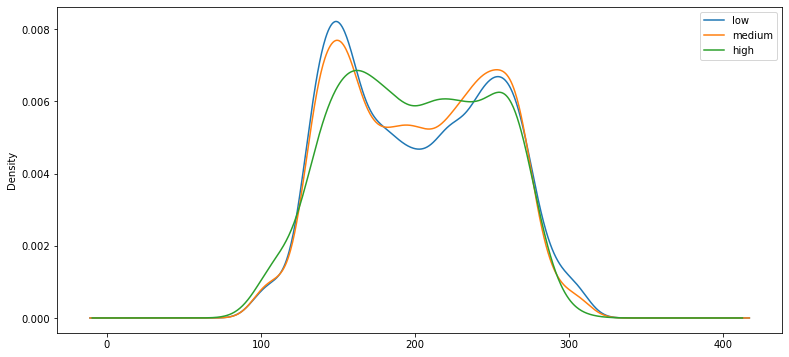

In [16]:
# график распределения сотрудников по зарплатам

df_7.plot(kind='density')

In [17]:
# т.к. распределение не нормальное, используем критерий Краскела — Уоллиса для трёх вариантов зарплат

stat, p = st.kruskal(low, medium, high)

print('Statistics = %.3f, p = %.7f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics = 0.566, p = 0.7533995
Одинаковые распределения (не отвергаем H0)


In [18]:
# теперь только для low и high - критерий Манна — Уитни

stat, p = st.mannwhitneyu(low, high)

print('Statistics = %.3f, p = %.7f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics = 4507096.500, p = 0.4120665
Одинаковые распределения (не отвергаем H0)


In [19]:
# посчитаем среднее число часов, которое сотрудники проводят на работе в каждом зарплатном сегменте отдельно

df_7.mean()

low       200.996583
medium    201.338349
high      199.867421
dtype: float64

#### Вывод:
Во-первых, если просто посчитать среднее время, которое сотрудники проводят на работе, в зависимости от того, какую зарплату они получают, то окажется, что средние почти одинаковы - около 200 часов.  
Во-вторых, проведя анализ и построив графики распределения сотрудников по времени, проведенному на работе, мы убедились, что распределения можно считать одинаковыми.  
Значит, неважно, сколько времени проводят сотрудники на работе: на зарплату данный показатель существенного влияния не оказывает. Хотя из графиков и можно заметить некоторую тенденцию, что на интервале примерно 130 - 270 часов, сотрудники с высокой зарплатой имеют более равномерное распределение, а сотрудники с низкой и средней зарплатой чуть чаще находятся около отметок 160 и 270 часов (дисклеймер: цифры в данном предложении взяты условно "на глаз" с графиков ради "просто порассуждать").
____

#### Задание 8
Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет  
● Средняя степень удовлетворенности  
● Среднее количество проектов  

In [20]:
# сделаем датафрейм с не уволившимися сотрудниками (далее: left_0)

left_0 = hr[hr['left'] == 0][['promotion_last_5years','satisfaction_level','number_project']]
left_0

,promotion_last_5years,satisfaction_level,number_project
2000,0,0.58,4
2001,0,0.82,2
2002,0,0.45,5
2003,0,0.78,5
2004,0,0.49,3
...,...,...,...
14206,1,0.90,3
14207,1,0.74,5
14208,1,0.85,3
14209,1,0.33,3


In [21]:
# сделаем датафрейм с уволившимися сотрудниками (далее: left_1)

left_1 = hr[hr['left'] == 1][['promotion_last_5years','satisfaction_level','number_project']]
left_1

,promotion_last_5years,satisfaction_level,number_project
0,0,0.38,2
1,0,0.80,5
2,0,0.11,7
3,0,0.72,5
4,0,0.37,2
...,...,...,...
14994,0,0.40,2
14995,0,0.37,2
14996,0,0.37,2
14997,0,0.11,6


In [22]:
# доля сотрудников с повышением за последние 5 лет среди left_0

left_0.groupby('promotion_last_5years').size() / len(left_0)

promotion_last_5years
0    0.973749
1    0.026251
dtype: float64

In [23]:
# доля сотрудников с повышением за последние 5 лет среди left_1

left_1.promotion_last_5years.value_counts() / len(left_1)

0    0.994679
1    0.005321
Name: promotion_last_5years, dtype: float64

In [24]:
# средняя степень удовлетворенности left_0:

left_0.satisfaction_level.mean()

0.666809590479516

In [25]:
# средняя степень удовлетворенности left_1:

left_1.satisfaction_level.mean()

0.44009801176140917

Среднее количество проектов:

In [26]:
# среднее количество проектов left_0:

left_0.number_project.mean()

3.786664333216661

In [27]:
# среднее количество проектов left_1:

left_1.number_project.mean()

3.8555026603192384

#### Задание 9
Разделить данные на тестовую и обучающую выборки.  
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и
salary).  
Оценить качество модели на тестовой выборке.

In [28]:
# соберем датафрейм, исключив стобцы согласно заданию и столбец, который собираемся предсказывать (left)

df_9 = hr.drop(columns=['department','salary','left'])

# соберем датафрейм, включающий переменную, которую будем предсказывать (left)

left = pd.DataFrame({'left':hr.left})

In [29]:
# поделим наши новые датафреймы на тренировочные и тестовые

X_train, X_test, y_train, y_test = train_test_split(df_9, left, test_size=0.25)

In [30]:
# строим модель LDA

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

D:\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [31]:
# предсказываем значения переменной с помощью нашей модели

y_predict = lda.predict(X_test)
pd.DataFrame(y_predict).value_counts()

0    3278
1     472
dtype: int64

In [32]:
# сравниваем предсказанные значения с фактическими

accuracy_score(y_test, y_predict)

0.7541333333333333